In [1]:
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import importlib
import sys
sys.path.insert(0, '../utils')
import data_utils
import visualization
import evaluation

# importlib.reload(visualization)

sys.path.insert(0, '../models')
import log_reg_word_embeddings

In [4]:
df_train = data_utils.load_data_set('../data/train/train.csv')
df_train_x = df_train[['head.word', 'tail.word', 'sentence']]
df_train_y = df_train['relation']

In [5]:
model = log_reg_word_embeddings_all.LogRegWordEmbeddingsAll()

In [6]:
model.fit(df_train_x, df_train_y)

Tokenizing head.words, tail.words and sentences...
    head.word         tail.word  \
0  [syracuse]  [onondaga, lake]   
1  [syracuse]  [onondaga, lake]   
2  [syracuse]  [onondaga, lake]   
3    [turkey]           [adana]   
4    [turkey]           [adana]   

                                            sentence  
0  [she, also, oversaw, refinancing, state, super...  
1  [more, 2, 5, million, cubic, yards, contaminat...  
2  [the, onondaga, nation, 1, 500, members, feder...  
3  [he, born, istanbul, raised, eastern, city, ad...  
4  [by, end, recent, tour, rollins, met, soldiers...  
Averaging word embeddings...
                                           head.word  \
0  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
1  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
2  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
3  [0.090082, -0.021439, -0.200264, 0.084044, 0.1...   
4  [0.090082, -0.021439, -0.200264, 0.084044, 0.1...   

                                          

In [7]:
model.predict(df_train_x.head())

Tokenizing head.words, tail.words and sentences...
    head.word         tail.word  \
0  [syracuse]  [onondaga, lake]   
1  [syracuse]  [onondaga, lake]   
2  [syracuse]  [onondaga, lake]   
3    [turkey]           [adana]   
4    [turkey]           [adana]   

                                            sentence  
0  [she, also, oversaw, refinancing, state, super...  
1  [more, 2, 5, million, cubic, yards, contaminat...  
2  [the, onondaga, nation, 1, 500, members, feder...  
3  [he, born, istanbul, raised, eastern, city, ad...  
4  [by, end, recent, tour, rollins, met, soldiers...  
Averaging word embeddings...
                                           head.word  \
0  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
1  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
2  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
3  [0.090082, -0.021439, -0.200264, 0.084044, 0.1...   
4  [0.090082, -0.021439, -0.200264, 0.084044, 0.1...   

                                          

array(['/location/location/contains', '/location/location/contains',
       '/location/location/contains',
       '/location/country/administrative_divisions',
       '/location/country/administrative_divisions'], dtype=object)

In [8]:
import pickle

save_dir = '../trained_models/log_reg_word_embeddings_all.pkl'
with open(save_dir, 'wb') as save_file:
    pickle.dump(model.model, save_file)

In [9]:
with open(save_dir, 'rb') as saved_file:
    loaded_model = pickle.load(saved_file)

In [10]:
loaded_model

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=6, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [11]:
df_test = data_utils.load_data_set('../data/test/test.csv')
df_test_x = df_test[['head.word', 'tail.word', 'sentence']]
df_test_y = df_test['relation']

In [12]:
predictions = model.predict(df_test_x)

Tokenizing head.words, tail.words and sentences...
              head.word            tail.word  \
0  [arthur, schnitzler]             [vienna]   
1      [roberto, calvi]              [italy]   
2      [johnny, rivers]          [louisiana]   
3         [philippines]  [san, carlos, city]   
4       [alex, salmond]           [scotland]   

                                            sentence  
0  [the, little, comedy, mannered, operetta, base...  
1  [a, court, rome, acquitted, five, people, accu...  
2  [there, also, performers, born, louisiana, inc...  
3  [when, julian, resuello, mayor, san, carlos, c...  
4  [a3, concern, raised, libya, deal, alex, salmo...  
Averaging word embeddings...
                                           head.word  \
0  [0.14344, 0.140793, 0.024160499999999994, 0.19...   
1  [0.126935, 0.115716, -0.051785, 0.20748, 0.177...   
2  [0.08202799999999999, 0.08247650000000001, -0....   
3  [0.25001, -0.049111, -0.12445, 0.044313, 0.221...   
4  [0.173818, 0.10580

In [13]:
from collections import Counter
Counter(predictions)

predicted_labels = predictions
gold_labels = df_test_y

Counter(gold_labels)

Counter({'/people/person/place_of_birth': 3684,
         '/people/person/nationality': 3672,
         '/people/person/place_lived': 5469,
         '/location/country/administrative_divisions': 7445,
         '/location/location/contains': 19046,
         '/sports/sports_team/location': 2299,
         '/business/person/company': 7068,
         '/location/us_county/county_seat': 704,
         'NA': 61591,
         '/business/company/founders': 6326,
         '/people/deceased_person/place_of_death': 3138,
         '/location/administrative_division/country': 8424,
         '/film/film/featured_film_locations': 166,
         '/business/company/place_founded': 5327,
         '/location/country/capital': 2434,
         '/people/person/children': 24734,
         '/location/neighborhood/neighborhood_of': 2579,
         '/people/deceased_person/place_of_burial': 385,
         '/film/film_location/featured_in_films': 491,
         '/people/ethnicity/geographic_distribution': 2539,
         '/pe

Counter({'/people/person/place_of_birth': 162,
         '/people/person/nationality': 723,
         '/people/person/place_lived': 450,
         '/location/location/contains': 2793,
         '/sports/sports_team/location': 10,
         '/business/person/company': 302,
         '/location/country/capital': 553,
         '/business/company/founders': 95,
         '/film/film/featured_film_locations': 2,
         '/location/administrative_division/country': 424,
         '/location/us_county/county_seat': 23,
         '/people/deceased_person/place_of_death': 68,
         '/business/company/place_founded': 20,
         '/location/neighborhood/neighborhood_of': 68,
         '/people/person/children': 30,
         '/film/film_location/featured_in_films': 2,
         '/people/ethnicity/geographic_distribution': 136,
         '/location/country/administrative_divisions': 424,
         '/location/us_state/capital': 39,
         '/business/company_advisor/companies_advised': 8,
         '/time/e

In [19]:
with open('../data/classes.json') as f:
    classes_json = json.load(f)
classes = np.asarray(list(classes_json.keys()))

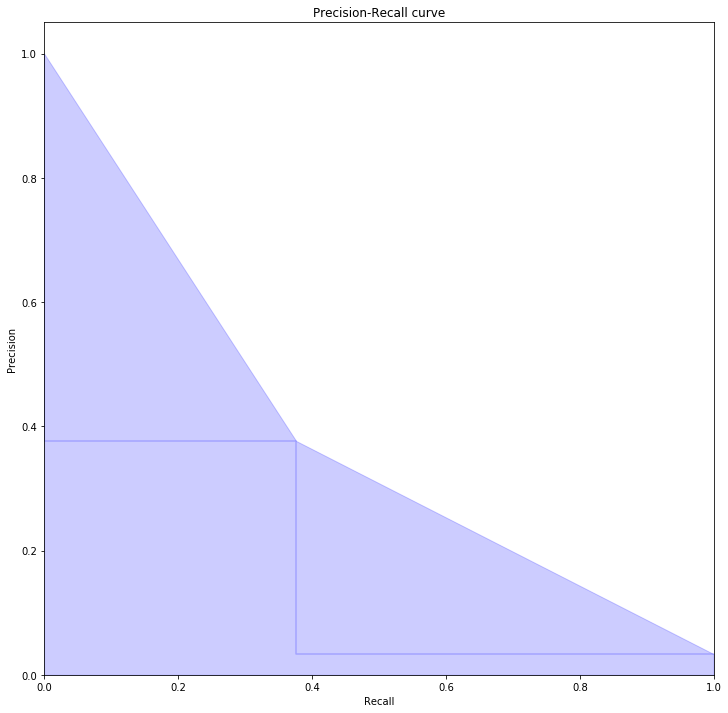

<module 'matplotlib.pyplot' from '/home/tony/source/relation-extraction/venv/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [22]:
# Precision-Recall Curve
precision, recall, threshold = evaluation.compute_precision_recall_curve(
    y_true=df_test_y.values.reshape(-1, 1),
    y_pred=predicted_labels.reshape(-1, 1),
    classes=classes.reshape(-1, 1)
)

plt.rcParams["figure.figsize"] = (12, 12)
visualization.plot_precision_recall_curve(precision, recall)

In [23]:
evaluation.compute_score(predicted_labels, gold_labels, labels=classes)

/home/tony/source/relation-extraction/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tony/source/relation-extraction/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


{'accuracy': 0.3764164182739704,
 'precision': 0.9554320079260119,
 'recall': 0.3764164182739704,
 'f1': 0.5203980477925803}

In [24]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(
    y_true=gold_labels,
    y_pred=predicted_labels,
    labels=classes
)
cnf_matrix

array([[    0,     0,     8,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,    70,     4,    13,     0,     3,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     5],
       [    0,    12,    28,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     6],
       [    0,     0,     0,    18,     0,     0,     0,     0,     1,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     1],
       [    0,     0,     0,

Confusion matrix, without normalization
[[    0     0     8     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0    70     4    13     0     3     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     5]
 [    0    12    28     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     6]
 [    0     0     0    18     0     0     0     0     1     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     1]
 [    0     0     0     0     0     8     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     3     0     3

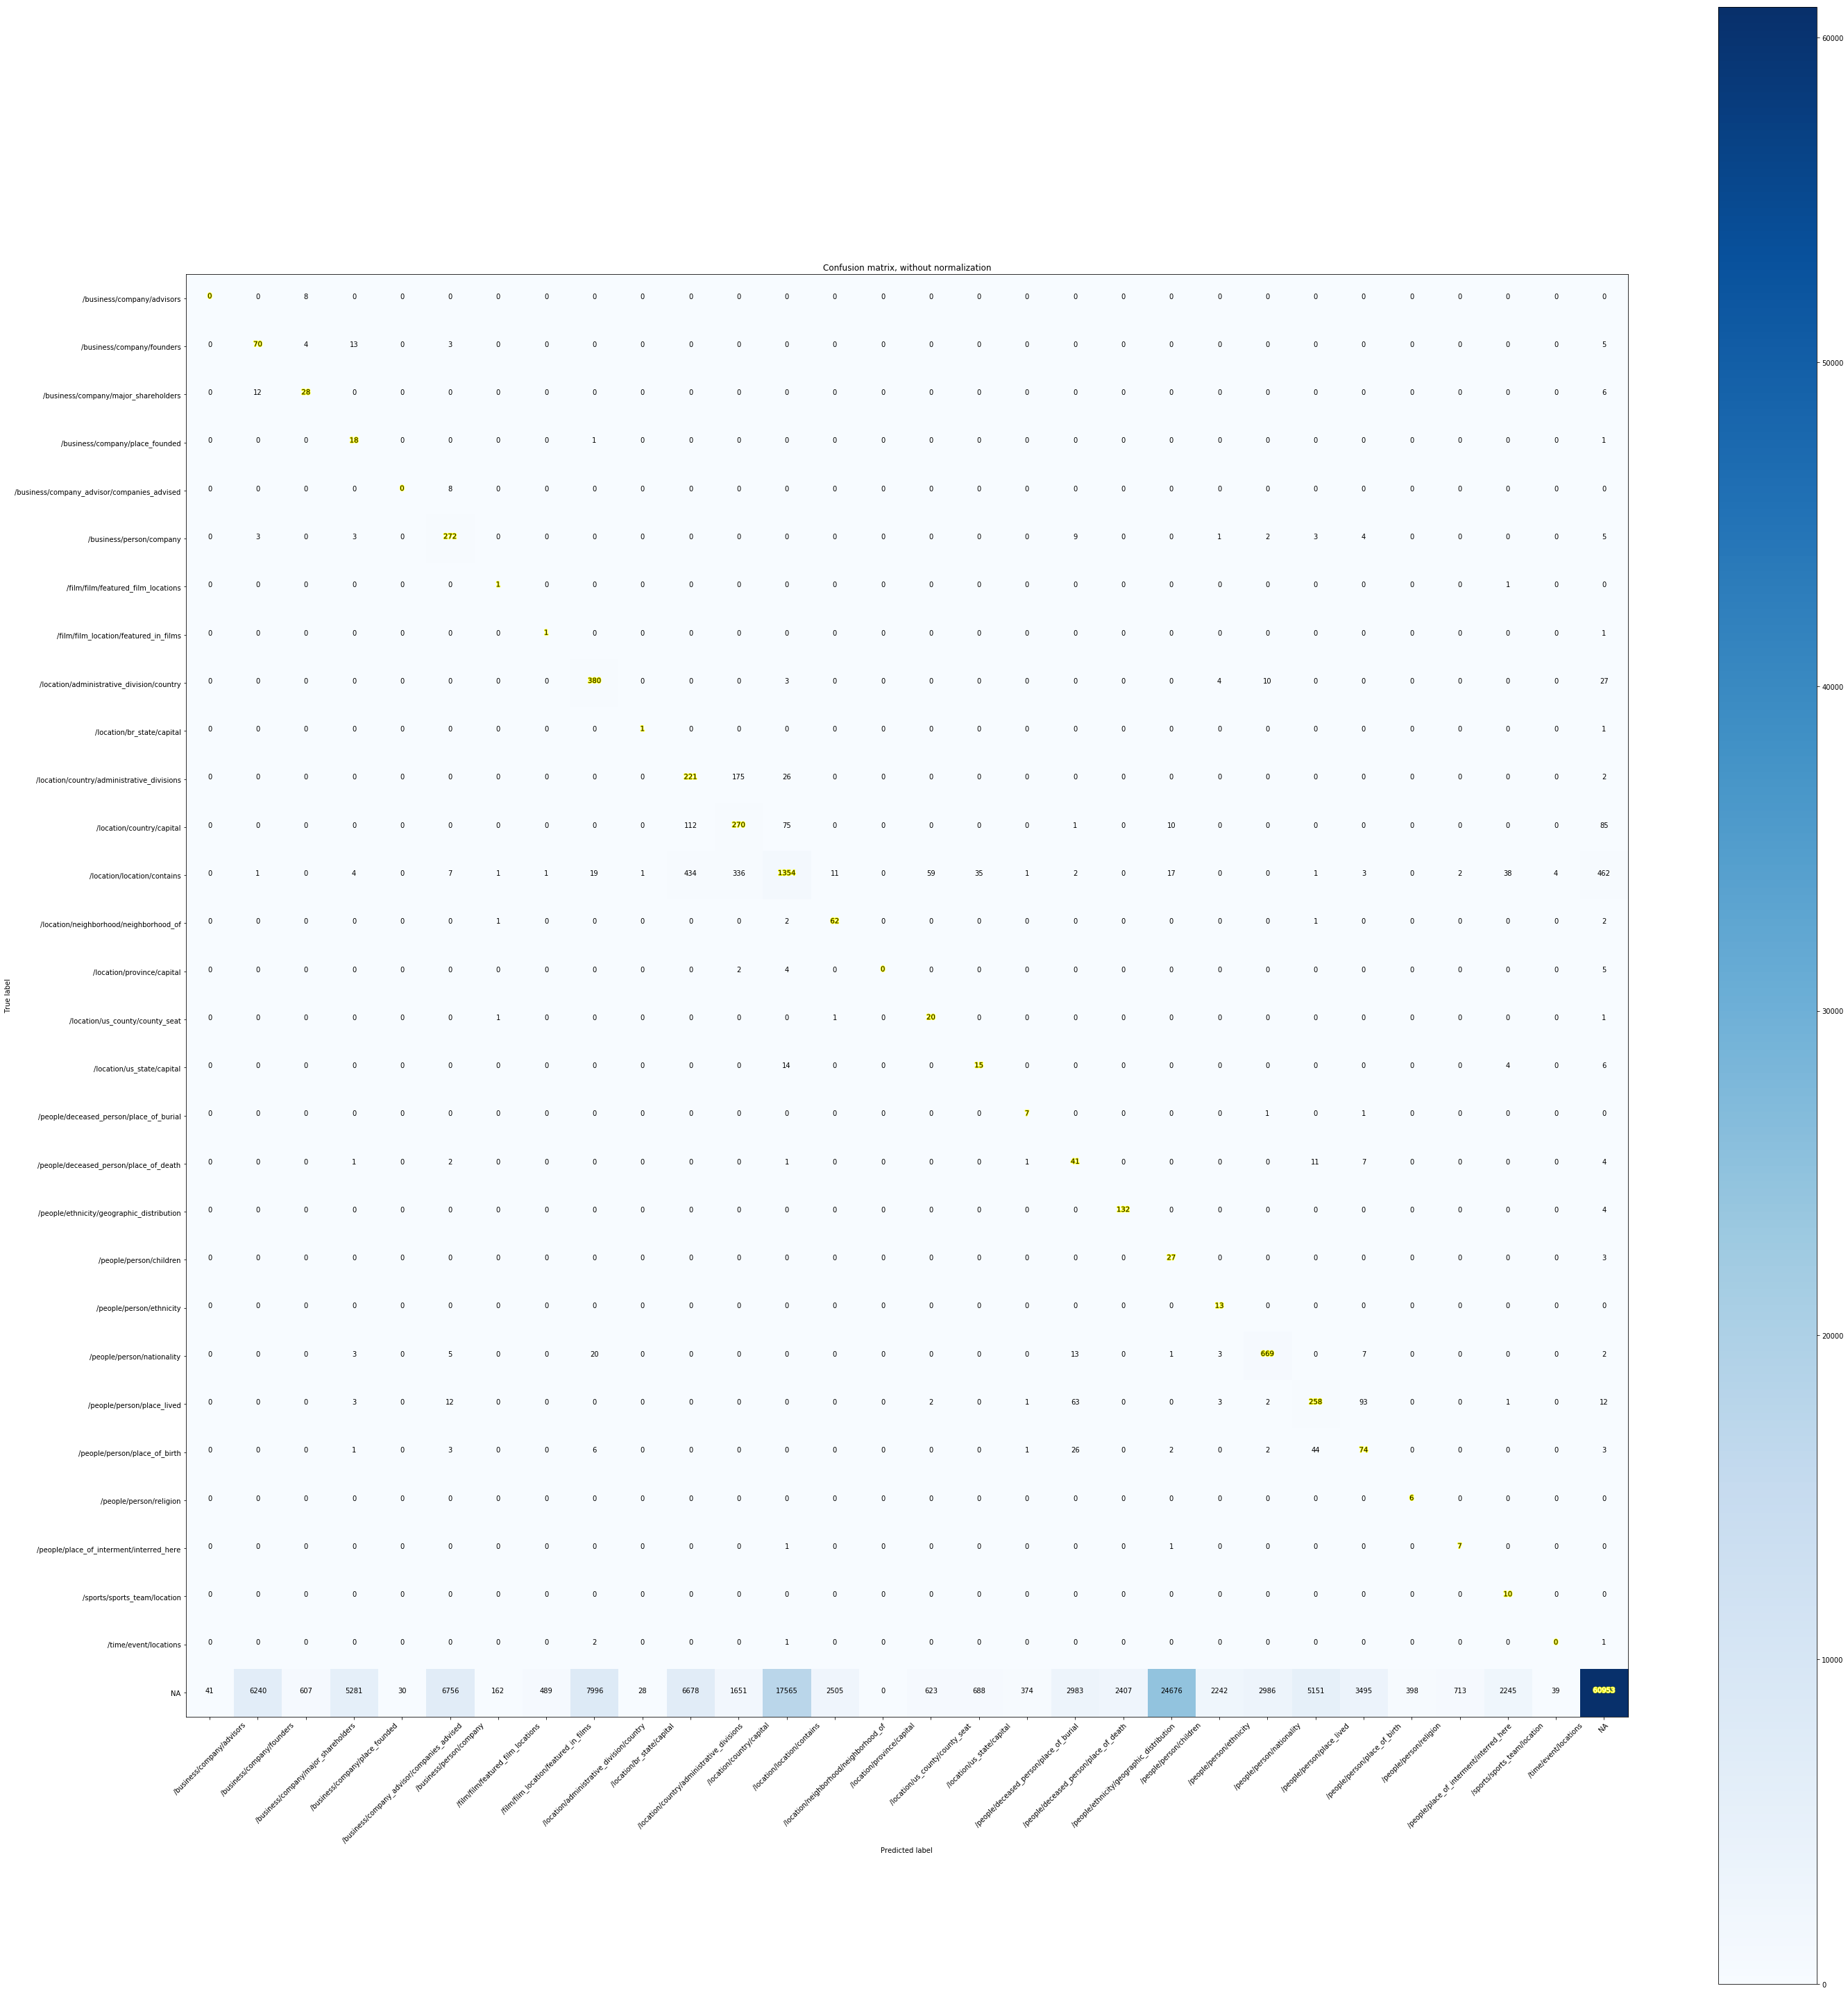

Normalized confusion matrix
[[0.0e+00 0.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 7.4e-01 4.2e-02 1.4e-01 0.0e+00 3.2e-02 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 5.3e-02]
 [0.0e+00 2.6e-01 6.1e-01 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 1.3e-01]
 [0.0e+00 0.0e+00 0.0e+00 9.0e-01 0.0e+00 0.0e+00 0.0e+00 0.0e+00 5.0e-02
  0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0

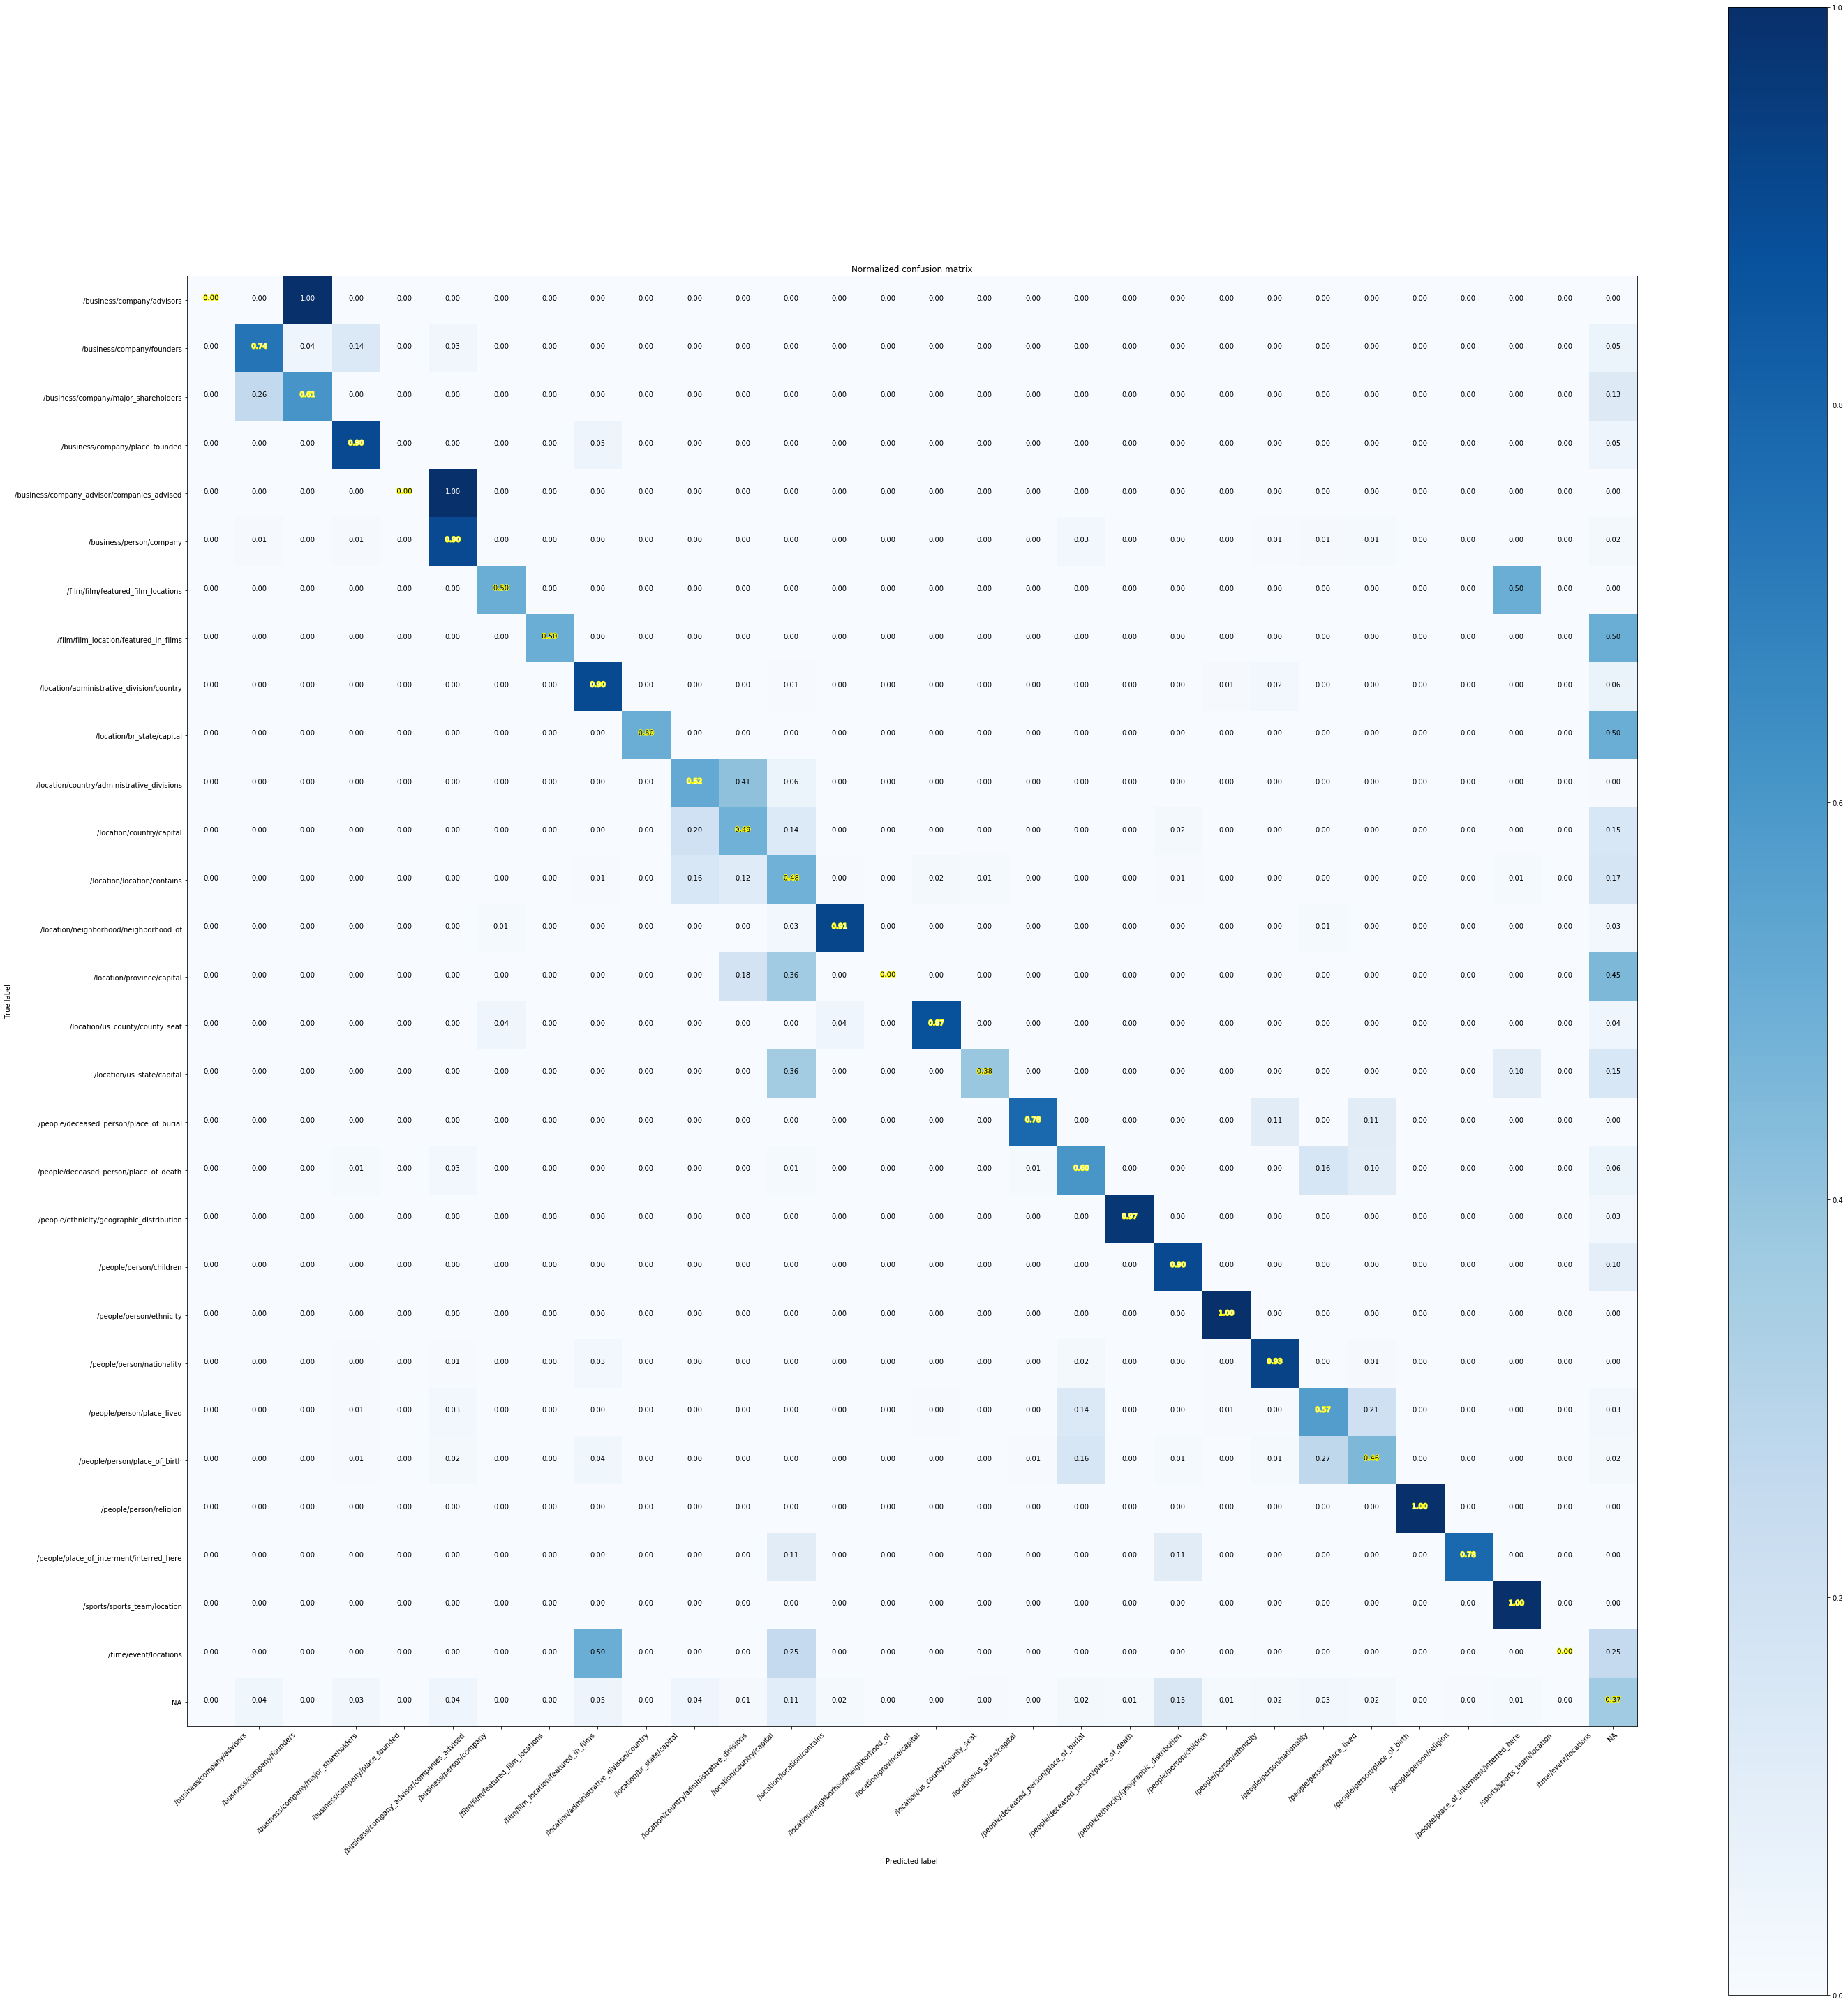

In [26]:
plt.rcParams["figure.figsize"] = (40, 40)

# Plot non-normalized confusion matrix
visualization.plot_confusion_matrix(cnf_matrix,
                      classes=classes,
                      title='Confusion matrix, without normalization').show()

# Plot normalized confusion matrix
visualization.plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,
                      title='Normalized confusion matrix').show()